<a href="https://colab.research.google.com/github/yvsim001/KI-Projekt/blob/main/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tf.__version__

'2.17.1'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
data = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
data_frame = pd.DataFrame(data)

#print(data_frame)
print("Shape of the data frame:")
print(data_frame.shape)
#print(pd.DataFrame(data).shape)

Shape of the data frame:
(2, 2)


In [7]:
(X_train_full, y_train_full),(X_test,y_test)=data

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
X_train_full.dtype


dtype('uint8')

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0,X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [12]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1)
print(X_train_reshape[0].shape, y_train.shape)

(784,) (55000,)


In [13]:
y_test.shape

(10000,)

In [14]:
y_test[:3]
print(y_test.max(),y_test.min() )

9 0


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]




In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])


In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6724 - loss: 1.0225 - val_accuracy: 0.8208 - val_loss: 0.5335
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8263 - loss: 0.5034 - val_accuracy: 0.8490 - val_loss: 0.4543
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8448 - loss: 0.4461 - val_accuracy: 0.8516 - val_loss: 0.4313
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8534 - loss: 0.4182 - val_accuracy: 0.8636 - val_loss: 0.3957
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8600 - loss: 0.3990 - val_accuracy: 0.8682 - val_loss: 0.3877
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8671 - loss: 0.3804 - val_accuracy: 0.8660 - val_loss: 0.3865
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8718 - loss: 0.3656 - val_accuracy: 0.8722 - val_loss: 0.3623
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.3591 - 

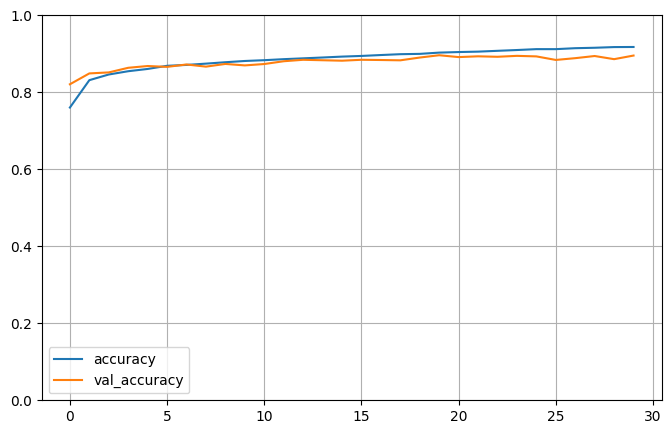

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(y=[0,2],figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertikalen Bereich auf [0-1]setzen
plt.show()

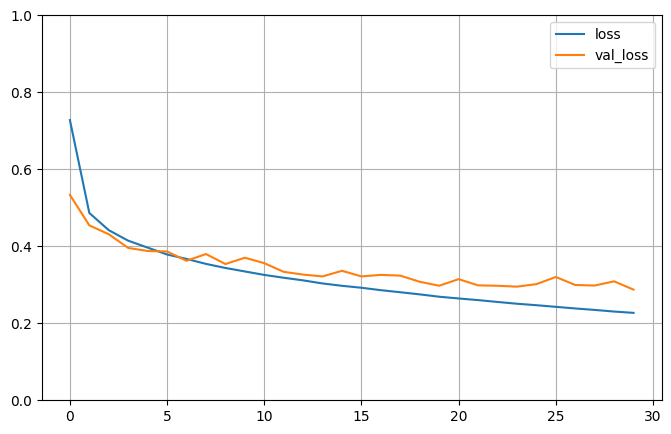

In [22]:
pd.DataFrame(history.history).plot(y=[1,3],figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertikalen Bereich auf [0-1]setzen
plt.show()

In [23]:
 model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.3254


[0.3222779631614685, 0.8877000212669373]

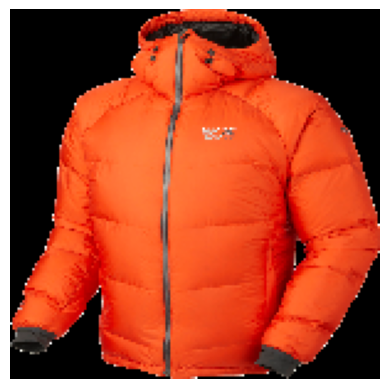

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger une image à partir d'un fichier local

img_path = '/content/drive/MyDrive/Colab Notebooks/Veste-Transparentes-PNG-De-Fichier-1174927565.png'  # Remplacez par votre propre chemin
img = image.load_img(img_path, target_size=(150, 150))  # Ajustez la taille selon les attentes du modèle

# Convertir l'image en tableau numpy
img_array = image.img_to_array(img)

# Ajouter une dimension pour représenter le batch
img_array = np.expand_dims(img_array, axis=0)

# Normaliser les pixels (si nécessaire, par exemple, diviser par 255 si votre modèle attend des valeurs entre 0 et 1)
img_array = img_array / 255.0

# Afficher l'image pour vérification
plt.imshow(img)
plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


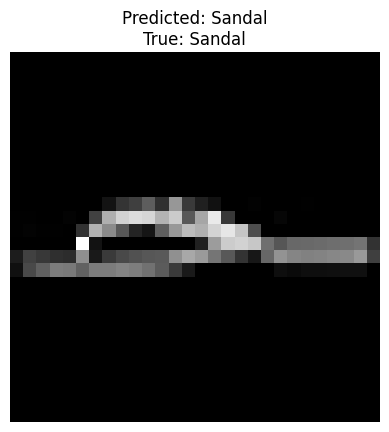

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to be between 0 and 1 (if needed)
test_images = test_images / 255.0

# Assuming 'model' is your trained model
# Example of prediction using the model
y_pred = model.predict(test_images)  # Get predictions for the test set
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class (index of the class with the highest probability)

# Select a random or fixed index for the image
index = 8  # You can change the index to test other images

# Predicted class for this index
predicted_class = y_pred_classes[index]

# Actual class
true_class = test_labels[index]

# List of class names from the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the image and the classes
plt.imshow(test_images[index], cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}\nTrue: {class_names[true_class]}')
plt.axis('off')
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


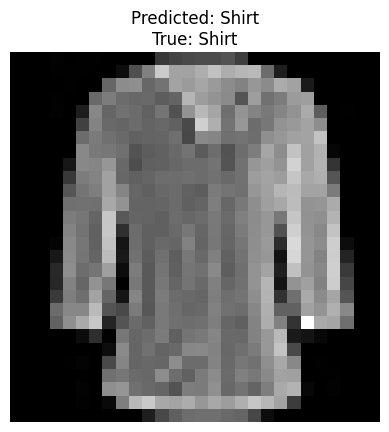

In [36]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to be between 0 and 1 (if needed)
test_images = test_images / 255.0

# Assuming 'model' is your trained model
# Example of prediction using the model
y_pred = model.predict(test_images)  # Get predictions for the test set
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class (index of the class with the highest probability)

# Select a random or fixed index for the image
index = 4  # You can change the index to test other images

# Predicted class for this index
predicted_class = y_pred_classes[index]

# Actual class
true_class = test_labels[index]

# List of class names from the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the image and the classes
plt.imshow(test_images[index], cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}\nTrue: {class_names[true_class]}')
plt.axis('off')
plt.show()



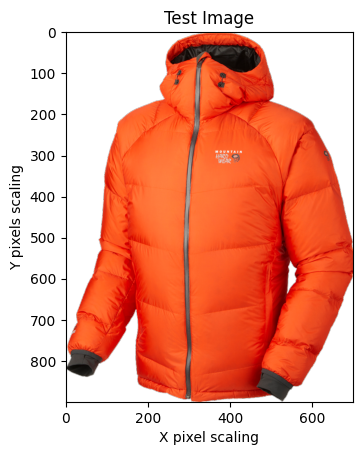

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("Test Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

image = mpimg.imread(img_link)
plt.imshow(image)
plt.show()